# Open the file "fashion.csv" using pandas

In [1]:
import pandas as pd

In [2]:
# read file
df = pd.read_csv("C:/Users/DELL/Desktop/fashion.csv")
reviews = df["review text"]

# Generate polarity scores

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def df_nltk(sentence):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)
    return ss

# Transform the output into DateFrame

In [92]:
ss_result = (df_nltk(row) for row in reviews)
df_ss = pd.DataFrame(ss_result)
df_ss.drop('compound', axis=1, inplace=True)
df_ss.columns = ['Negative Score','Neutral Score','Positive Score']
df_ss.insert(0, "id", df_ss.index) 
df_ss.head(10)

,id,Negative Score,Neutral Score,Positive Score
0,0,0.012,0.883,0.105
1,1,0.052,0.889,0.059
2,2,0.006,0.872,0.122
3,3,0.054,0.846,0.100
4,4,0.017,0.866,0.116
5,5,0.031,0.797,0.173
6,6,0.025,0.855,0.120
7,7,0.011,0.839,0.150
8,8,0.039,0.867,0.094
9,9,0.015,0.919,0.066


# Transform the Dateframe into csv

In [71]:
df_ss.to_csv('sentiment_output.csv', index=False)

# Merge the output file with the original input file

In [72]:
df_text = pd.DataFrame(df)
df_result = df_text.join(df_ss)
df_result.head(20)

,year,season,brand,author of review,location,time,review text,id,Negative Score,Neutral Score,Positive Score
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,0,0.012,0.883,0.105
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,1,0.052,0.889,0.059
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,2,0.006,0.872,0.122
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",3,0.054,0.846,0.100
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,4,0.017,0.866,0.116
5,2016,Spring,Ace & Jig,Kristin Anderson,NEW YORK,"October 13, 2015",Process has always been paramount to Ace & Jig...,5,0.031,0.797,0.173
6,2016,Spring,Acne Studios,Chioma Nnadi,PARIS,"October 3, 2015",A bohemian circle of muses have been in heavy ...,6,0.025,0.855,0.120
7,2016,Spring,Adam Lippes,Nicole Phelps,NEW YORK,"September 12, 2015",Walking into Adam Lippess Washington Square ap...,7,0.011,0.839,0.150
8,2016,Spring,Adam Selman,Lee Carter,NEW YORK,"September 10, 2015","Ever the adventurer, Adam Selman will gleefull...",8,0.039,0.867,0.094
9,2016,Spring,ADEAM,Kristin Anderson,NEW YORK,"September 14, 2015",Hanako Maeda has been busy rediscovering her J...,9,0.015,0.919,0.066


# Summarize the sentiment scores for each of the four cities

In [73]:
#Calculate the average scores in the review.
neg = df_result.groupby('location')['Negative Score'].mean() 
neu = df_result.groupby('location')['Neutral Score'].mean() 
pos = df_result.groupby('location')['Positive Score'].mean() 

In [85]:
a = [neg, neu, pos]
for i in a:
    print('*************************************')
    print(i)

*************************************
location
LONDON      0.029726
MILAN       0.031792
NEW YORK    0.021287
PARIS       0.027318
Name: Negative Score, dtype: float64
*************************************
location
LONDON      0.868855
MILAN       0.862113
NEW YORK    0.865900
PARIS       0.869436
Name: Neutral Score, dtype: float64
*************************************
location
LONDON      0.101484
MILAN       0.106019
NEW YORK    0.112818
PARIS       0.103264
Name: Positive Score, dtype: float64


# Extra parts: Visualization

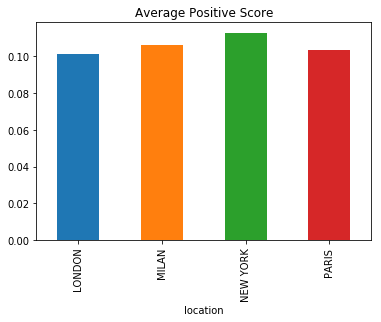

In [94]:
import matplotlib.pyplot as plt
pos.plot(kind='bar', title = 'Average Positive Score')

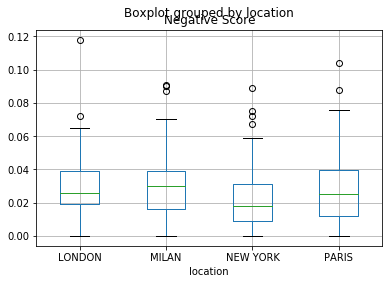

In [90]:
df_result.boxplot(column='Negative Score',by='location')
plt.show()